In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [63]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [64]:
X

array([[-7.39458346e+00,  7.94623770e+00],
       [ 9.98863894e+00, -4.65087819e+00],
       [-9.48455257e-03,  2.71801513e+00],
       ...,
       [-8.94350448e+00,  6.65052702e+00],
       [-7.11697890e+00,  5.71726129e+00],
       [ 9.46024734e+00, -4.89623062e+00]], shape=(1000, 2))

In [65]:
y

array([2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2,
       2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       2, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2,
       0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0,

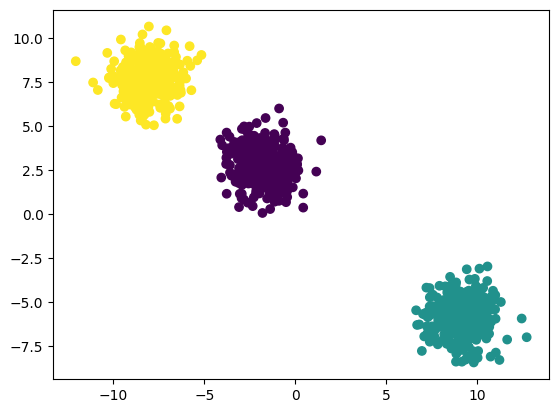

In [66]:
plt.scatter(X[:,0],X[:,1],c=y)

In [67]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [70]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [71]:
from sklearn.cluster import KMeans

In [72]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [73]:
wcss

[1340.0,
 208.55572081532782,
 35.901815305155836,
 30.8941386359727,
 25.93798266161796,
 24.169007585756113,
 19.047020667240286,
 17.23410836078451,
 15.251685009816939,
 14.295460767637193]

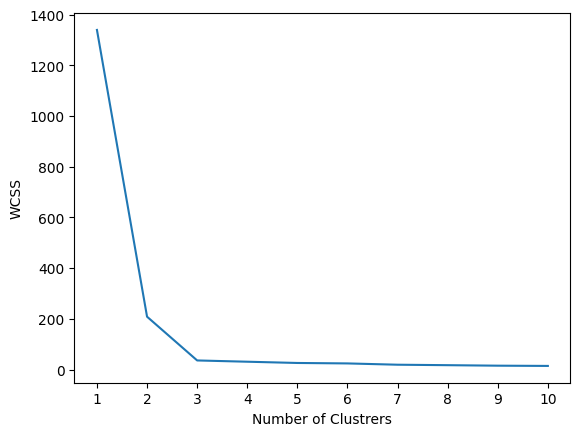

In [74]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [75]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [76]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2,
       2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0,

In [77]:
y_pred=kmeans.predict(X_test_scaled)

In [78]:
y_pred

array([0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0,
       0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0,
       1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2,

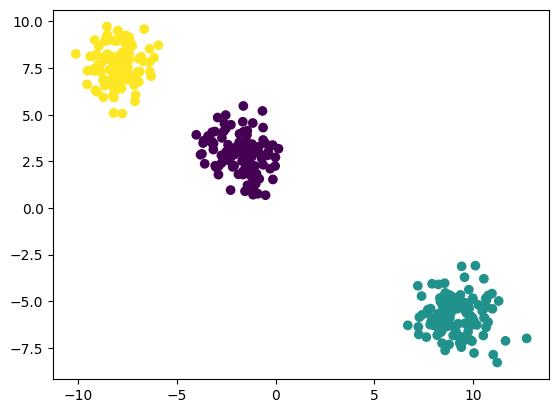

In [79]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [80]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [81]:
## kneelocator
!pip install kneed

In [82]:
from kneed import KneeLocator

In [83]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [84]:
kl.elbow

np.int64(3)

In [90]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [91]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [92]:
silhouette_coefficients

[0.7670690063604012,
 0.7982884920907594,
 0.6558193248633943,
 0.5250984081822441,
 0.37324387131862574,
 0.36802406332910514,
 0.34240023402385805,
 0.350762462811577,
 0.3485490518214337]

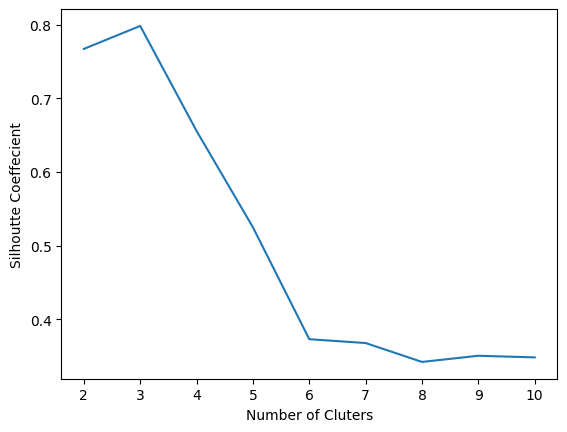

In [93]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()